# Supernova distances and redshifts - Part 1

Measuring the cosmological relationship between distance and redshift is at the heart of the entire field of cosmology and allowed, among other things, the discovery of dark energy! At high redshifts, this is done with Type Ia Supernova which are standard (or better, standardizable) candles.

Let's recall the definition of magnitude and the distance modulus (ah! the astronomers...)

$$
\mu = m-M =  5 \log_{10}\left(\frac{d_L}{\rm pc}\right) - 5
$$

Here is the Hubble diagram for Type Ia supernovae (which are standard candels). The lines show the predictions for cosmologies with varying amounts of Ωm and ΩΛ. The observed points all lie above the line for a universe with zero Λ. The lower panel, with the slope caused by the inverse square law taken out, shows the difference between the predictions more clearly and shows why a model with ΩΛ > 0 is favored. 

These are some (synthetic but realistic; see textbook) supernova data

In [1]:
import numpy as np
import scipy.stats as stats
import pylab as plt 
import math

Here we have:
- z_sample = redshifth
- mu_sample = magnitude
- dmu = error on the magnitude

(35.0, 50.0)

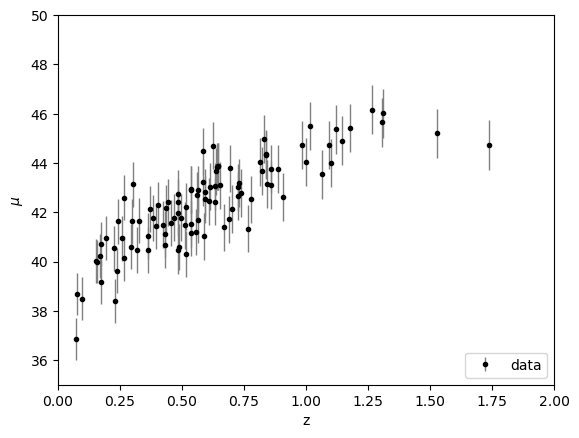

In [2]:
from astroML.datasets import generate_mu_z
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

### Part 1

**1) Linear regression**

Here, I fit the sample with a linear relation:
$$y_i = \theta_0 + \theta_1 x_i.$$

Now, I want estimate the value of $\theta_0$ and $\theta_1$. 

In [3]:
from astroML.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression.fit(z_sample.reshape(-1,1),mu_sample,dmu)

y = LinearRegression.predict(z_sample.reshape(-1,1))

C:\Users\utente\anaconda3\lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


(35.0, 50.0)

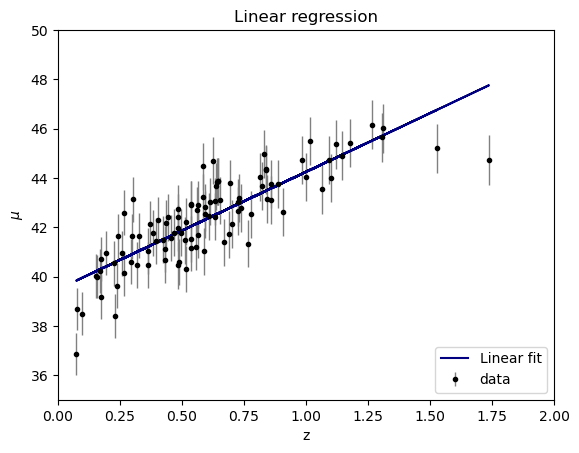

In [4]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.plot(z_sample,y, c ='navy', label= 'Linear fit')

plt.xlabel("z")
plt.ylabel("$\mu$")

plt.title("Linear regression")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

**2) Polynomial regression**

(35.0, 50.0)

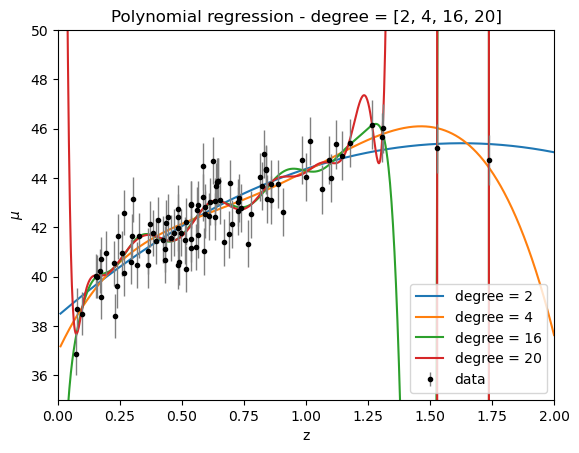

In [5]:
from astroML.linear_model import PolynomialRegression
#degree = np.arange(1, 20)
degree = [2,4,16,20]
z = np.linspace(0.01,2,1000)


for i in range (0,len(degree)):
    model = PolynomialRegression(degree[i])
    model.fit(z_sample.reshape(-1,1),mu_sample, dmu) #no reshape on the y value.
    y = model.predict(z.reshape(-1,1))
    
    plt.plot(z,y, label= 'degree = %s'%degree[i])
    
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")

plt.title("Polynomial regression - degree = %s"%degree)
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

**Cross validation** 

We consider one model: the polynomial one!

Polynomial Regression n= 0 0.8452437129935328 1.2929538946685875
Polynomial Regression n= 1 0.8421373571952497 1.1626110238818592
Polynomial Regression n= 2 0.8369790143733258 1.5262270728404281
Polynomial Regression n= 3 0.8340521111756517 1.015427700004665
Polynomial Regression n= 4 0.8312694184413658 4.029662845945658
Polynomial Regression n= 5 0.8207944336719663 20.84090872286238
Polynomial Regression n= 6 0.8194586701521497 6.713563259224594
Polynomial Regression n= 7 0.8192531015490083 16.03065495190789
Polynomial Regression n= 8 0.8128783051513147 469.2753400688101
Polynomial Regression n= 9 0.8098626438271758 1677.7592072929326
Polynomial Regression n= 10 0.7958618283975094 9580.71406826027
Polynomial Regression n= 11 0.7958945641858879 10863.060572234357
Polynomial Regression n= 12 0.781891539473699 197481.51071919655
Polynomial Regression n= 13 0.7723698553428173 406319.87933754886
Polynomial Regression n= 14 0.7425808074194227 4956898.494814847
Polynomial Regression n= 15 0.

C:\Users\utente\AppData\Local\Temp\ipykernel_28740\3413942184.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.log10(d), np.log10(crossval_err), '--k', label='cross-validation',color = 'red')
C:\Users\utente\AppData\Local\Temp\ipykernel_28740\3413942184.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(np.log10(d), np.log10(training_err), '-k', label='training', color='navy')


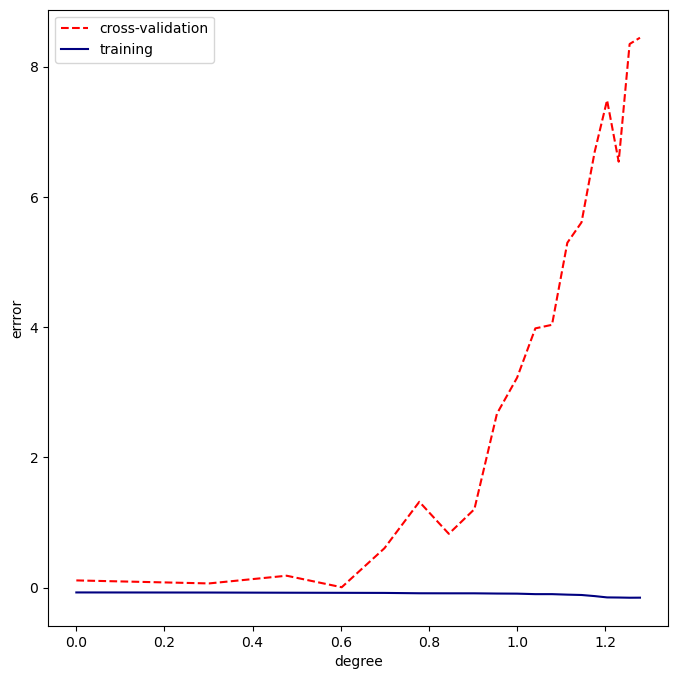

In [6]:
from sklearn.model_selection import train_test_split

d = np.arange(1, 20)
training_err = np.zeros(d.shape)
crossval_err = np.zeros(d.shape)

X = z_sample[:,np.newaxis]
y = mu_sample
dy = dmu

X_train, X_validation, ydy_train, ydy_validation = train_test_split(X, np.array([y,dy]).T, test_size=0.3,random_state=24)
y_train,dy_train = ydy_train.T
y_validation,dy_validation = ydy_validation.T



fig = plt.figure(figsize=(8, 8))

for i in range(len(d)):
    model = PolynomialRegression(d[i])
    model.fit(X_train,y_train,dy_train) #no reshape on the y value.
    y_fit = model.predict(X_train)
    
    y_cv = model.predict(X_validation)
    training_err[i] = np.sqrt(np.sum((y_train - y_fit) ** 2)/ len(X_train))
    crossval_err[i] = np.sqrt(np.sum((y_validation - y_cv) ** 2)/ len(X_validation))
    print("Polynomial Regression n=",i, training_err[i], crossval_err[i])
    
plt.plot(np.log10(d), np.log10(crossval_err), '--k', label='cross-validation',color = 'red')
plt.plot(np.log10(d), np.log10(training_err), '-k', label='training', color='navy')

plt.xlabel("degree")
plt.ylabel("errror")
plt.legend()

**K-Fold cross validation**

C:\Users\utente\AppData\Local\Temp\ipykernel_28740\3657336968.py:53: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(deg, TrainErr_median, '-k', label='training', color='navy')
C:\Users\utente\AppData\Local\Temp\ipykernel_28740\3657336968.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(deg, CrossErr_median, '--k', label='cross-validation',color = 'red')


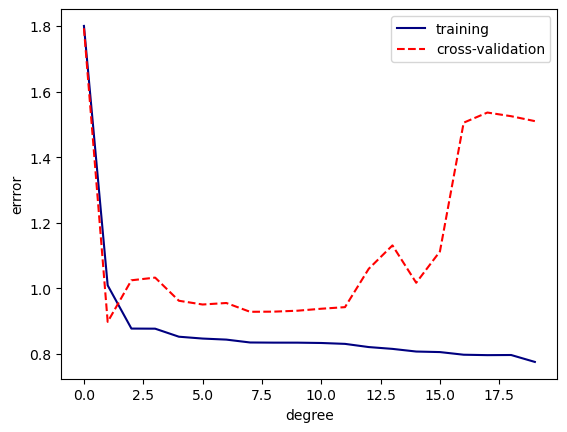

In [7]:
from sklearn.model_selection import KFold

kf = KFold(n_splits= 5) #n_splits = number of fold
n_splits = kf.get_n_splits(X)

deg = np.arange(0,20) 
training_err = []
crossval_err = []

X = z_sample[:,np.newaxis]
y = mu_sample
dy = dmu



for i,(train_index, test_index) in enumerate(kf.split(X)):
    #print("TRAIN:\n", train_index,"\n", "TEST:\n", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dy_train, dy_test = dy[train_index], dy[test_index]
    
    train_err = []
    cross_err = []
    
    for d in deg:
        model = PolynomialRegression(d)
        model.fit(X_train,y_train,dy_train) #no reshape on the y value.
        y_fit = model.predict(X_train)
        y_cv = model.predict(X_test)

        train_err.append(np.sqrt(np.sum((y_train - y_fit) ** 2)/ len(X_train))) #computing the training error on this fold
        cross_err.append(np.sqrt(np.sum((y_test - y_cv) ** 2)/ len(X_test))) #computing the validation error on this fold

    '''
    plt.plot(np.sort(X_train[:,0]), np.sort(y_fit), '--k', label='cross-validation',color = 'red')
    plt.scatter(X_test,y_test, color='navy')
    plt.scatter(X_train,y_train, color='red')
    plt.show()
    print("Y_FIT:\n", y_fit,"\n", "Y_CV:\n", y_cv)
    '''
    
    training_err.append(np.array(train_err))
    crossval_err.append(np.array(cross_err))


    

TrainErr_median = np.median(training_err,axis=0)
CrossErr_median = np.median(crossval_err,axis=0)


m = np.argmin(CrossErr_median)
plt.plot(deg, TrainErr_median, '-k', label='training', color='navy')
plt.plot(deg, CrossErr_median, '--k', label='cross-validation',color = 'red')
#plt.scatter(d[m],crossval_err[m], label = 'K-fold best model', color= 'orange')


plt.xlabel("degree")
plt.ylabel("errror")
plt.legend()

#print("\n error[min] =",crossval_err[m],"\n degree =",d[m])



(35.0, 50.0)

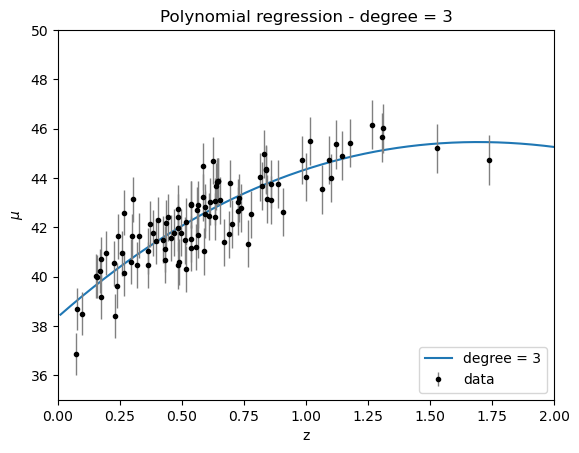

In [8]:
model = PolynomialRegression(3)
model.fit(z_sample.reshape(-1,1),mu_sample, dmu) #no reshape on the y value.
y = model.predict(z.reshape(-1,1))

plt.plot(z,y, label= 'degree = 3')

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")

plt.title("Polynomial regression - degree = 3")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)


- In what cases are you underfitting the data?
- In what cases are you overfitting the data?

### Part 2

**1) Basis Function Regression**

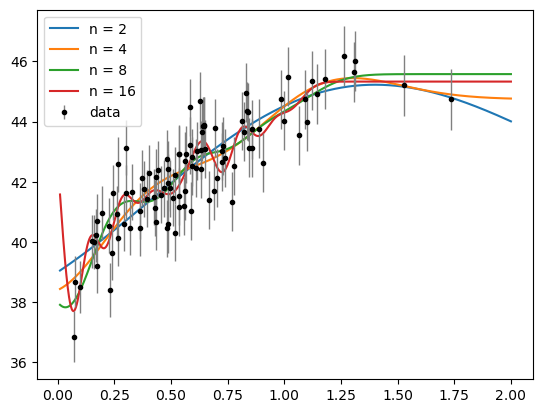

In [9]:
from astroML.linear_model import BasisFunctionRegression
n = [2,4,8,16]

for i in range (0,len(n)):
    
    mu = np.linspace(0,1,n[i])[:, None]
    sigma = mu[0]-mu[1]

    model = BasisFunctionRegression('gaussian', mu = mu ,sigma = sigma )
    model.fit(z_sample.reshape(-1,1),mu_sample,dmu) #no reshape on the y value.
    y = model.predict(z.reshape(-1,1))
    
    plt.plot(z,y, label = 'n = %s'%n[i])
    
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')

plt.legend()

**K-Fold cross validation**

C:\Users\utente\AppData\Local\Temp\ipykernel_28740\1518082627.py:49: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(n_gaussian, TrainErr_median, '-k', label='training',color = 'navy')
C:\Users\utente\AppData\Local\Temp\ipykernel_28740\1518082627.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(n_gaussian, CrossErr_median, '--k', label='cross-validation', color='red')


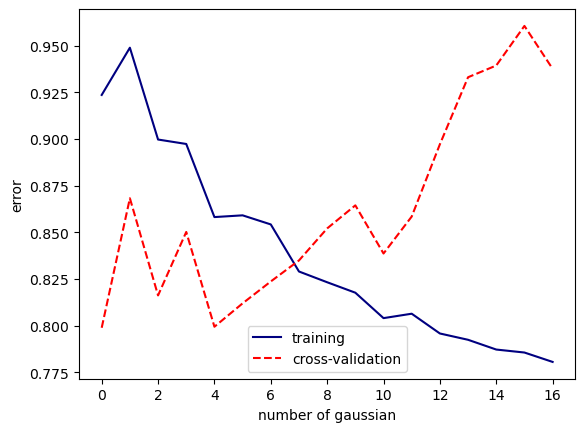

In [10]:
from sklearn.model_selection import KFold

kf = KFold(n_splits= 20) #n_splits = number of fold
n_splits = kf.get_n_splits(X)

d = np.arange(0,n_splits) 
training_err = []
crossval_err = []

X = z_sample[:,np.newaxis]
y = mu_sample
dy = dmu

n_gaussian = np.arange(2,19)

for i,(train_index, test_index) in enumerate(kf.split(X)):
    #print("TRAIN:\n", train_index,"\n", "TEST:\n", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dy_train, dy_test = dy[train_index], dy[test_index]

    
    train_err = []
    cross_err = []
    
    for j in n_gaussian:
        mu = np.linspace(0,1,j)[:, None]
        sigma = mu[1]-mu[0]
        #print(mu)
        model = BasisFunctionRegression('gaussian', mu = mu ,sigma = sigma)
        model.fit(X_train,y_train,dy_train) #no reshape on the y value.
        y_fit = model.predict(X_train)
        y_cv = model.predict(X_test)
    
        train_err.append(np.sqrt(np.sum((y_train - y_fit) ** 2)/ len(X_train))) #computing the training error on this fold
        cross_err.append(np.sqrt(np.sum((y_test - y_cv) ** 2)/ len(X_test))) #computing the validation error on this fold
    
    training_err.append(np.array(train_err))
    crossval_err.append(np.array(cross_err))
    #print(training_err[i])
    
    
TrainErr_median = np.median(training_err,axis=0)
CrossErr_median = np.median(crossval_err,axis=0)

n_gaussian = np.arange(17)

m = np.argmin(CrossErr_median)
plt.plot(n_gaussian, TrainErr_median, '-k', label='training',color = 'navy')
plt.plot(n_gaussian, CrossErr_median, '--k', label='cross-validation', color='red')
#plt.scatter(mean[m],CrossErr_median[m], label = 'K-fold best model', color= 'orange')


plt.xlabel("number of gaussian")
plt.ylabel("error")
plt.legend()

#print("\n error[min] =",crossval_err[m],"\n degree =",d[m])



**2) Kernel regression**

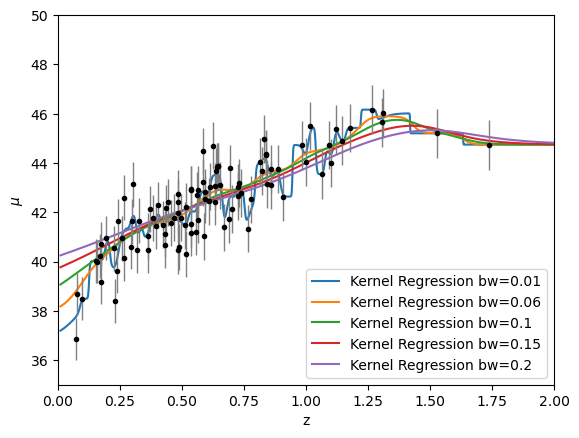

In [11]:
import astroML.linear_model

for bw in np.round(np.linspace(0.01,0.2,5),2):

    model = astroML.linear_model.NadarayaWatson('gaussian', bw)

    model.fit(z_sample[:,np.newaxis], mu_sample) # in this case dy is irrelevant!
    y = model.predict(z[:,np.newaxis])
   
    plt.plot(z,y,label='Kernel Regression bw='+str(bw))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1)
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50);

**K-Fold cross validation**

C:\Users\utente\AppData\Local\Temp\ipykernel_28740\4141916948.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(bw, TrainErr_median, '-k', label='training',color='navy')
C:\Users\utente\AppData\Local\Temp\ipykernel_28740\4141916948.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(bw,CrossErr_median , '--k', label='cross-validation', color = 'red')


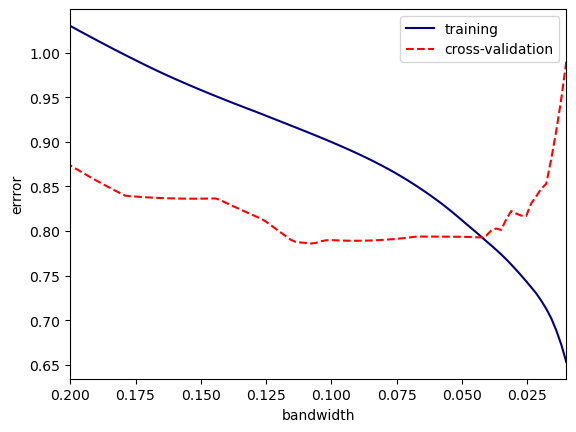

In [12]:
from sklearn.model_selection import KFold

kf = KFold(n_splits= 20) #n_splits = number of fold
n_splits = kf.get_n_splits(X)

bw = np.linspace(0.01,0.2,100) 
training_err = []
crossval_err = []


X = z_sample[:,np.newaxis]
y = mu_sample
dy = dmu



for i,(train_index, test_index) in enumerate(kf.split(X)):
    #print("TRAIN:\n", train_index,"\n", "TEST:\n", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dy_train, dy_test = dy[train_index], dy[test_index]

    train_err = []
    cross_err = []
    
    for b in bw:
        model = astroML.linear_model.NadarayaWatson('gaussian', b)
        model.fit(X_train,y_train,dy_train) #no reshape on the y value.
        y_fit = model.predict(X_train)
        y_cv = model.predict(X_test)
        
        train_err.append(np.sqrt(np.sum((y_train - y_fit) ** 2)/ len(X_train))) #computing the training error on this fold
        cross_err.append(np.sqrt(np.sum((y_test - y_cv) ** 2)/ len(X_test))) #computing the validation error on this fold
    
    
    training_err.append(np.array(train_err))
    crossval_err.append(np.array(cross_err))
    #print(training_err[i])
    
TrainErr_median = np.median(training_err,axis=0)
CrossErr_median = np.median(crossval_err,axis=0)

#m = np.argmin(CrossErr_median )
plt.plot(bw, TrainErr_median, '-k', label='training',color='navy')
plt.plot(bw,CrossErr_median , '--k', label='cross-validation', color = 'red')
#plt.scatter(bw[m],CrossErr_median[m], label = 'K-fold best model', color= 'orange')

plt.xlim(bw[-1],bw[0]) 
plt.xlabel("bandwidth")
plt.ylabel("errror")
plt.legend()

#print("\n error[min] =",crossval_err[m],"\n degree =",deg[m])

